# Problem 1: Line plots
In this problem, we will plot some daily weather data from a NOAA station in Millbrook, NY. A full description of this dataset is available at: https://www.ncdc.noaa.gov/data-access/land-based-station-data

The cell below uses pandas to download the data and populate a bunch of numpy arrays (t_daily_min, t_daily_max, etc.) Run the cell and then use the numpy arrays to try to re-create the plot you see.

In [2]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [3]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

print(p_daily_calc)

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 
[ 0.   0.   0.  ...  0.   0.2 17.4]


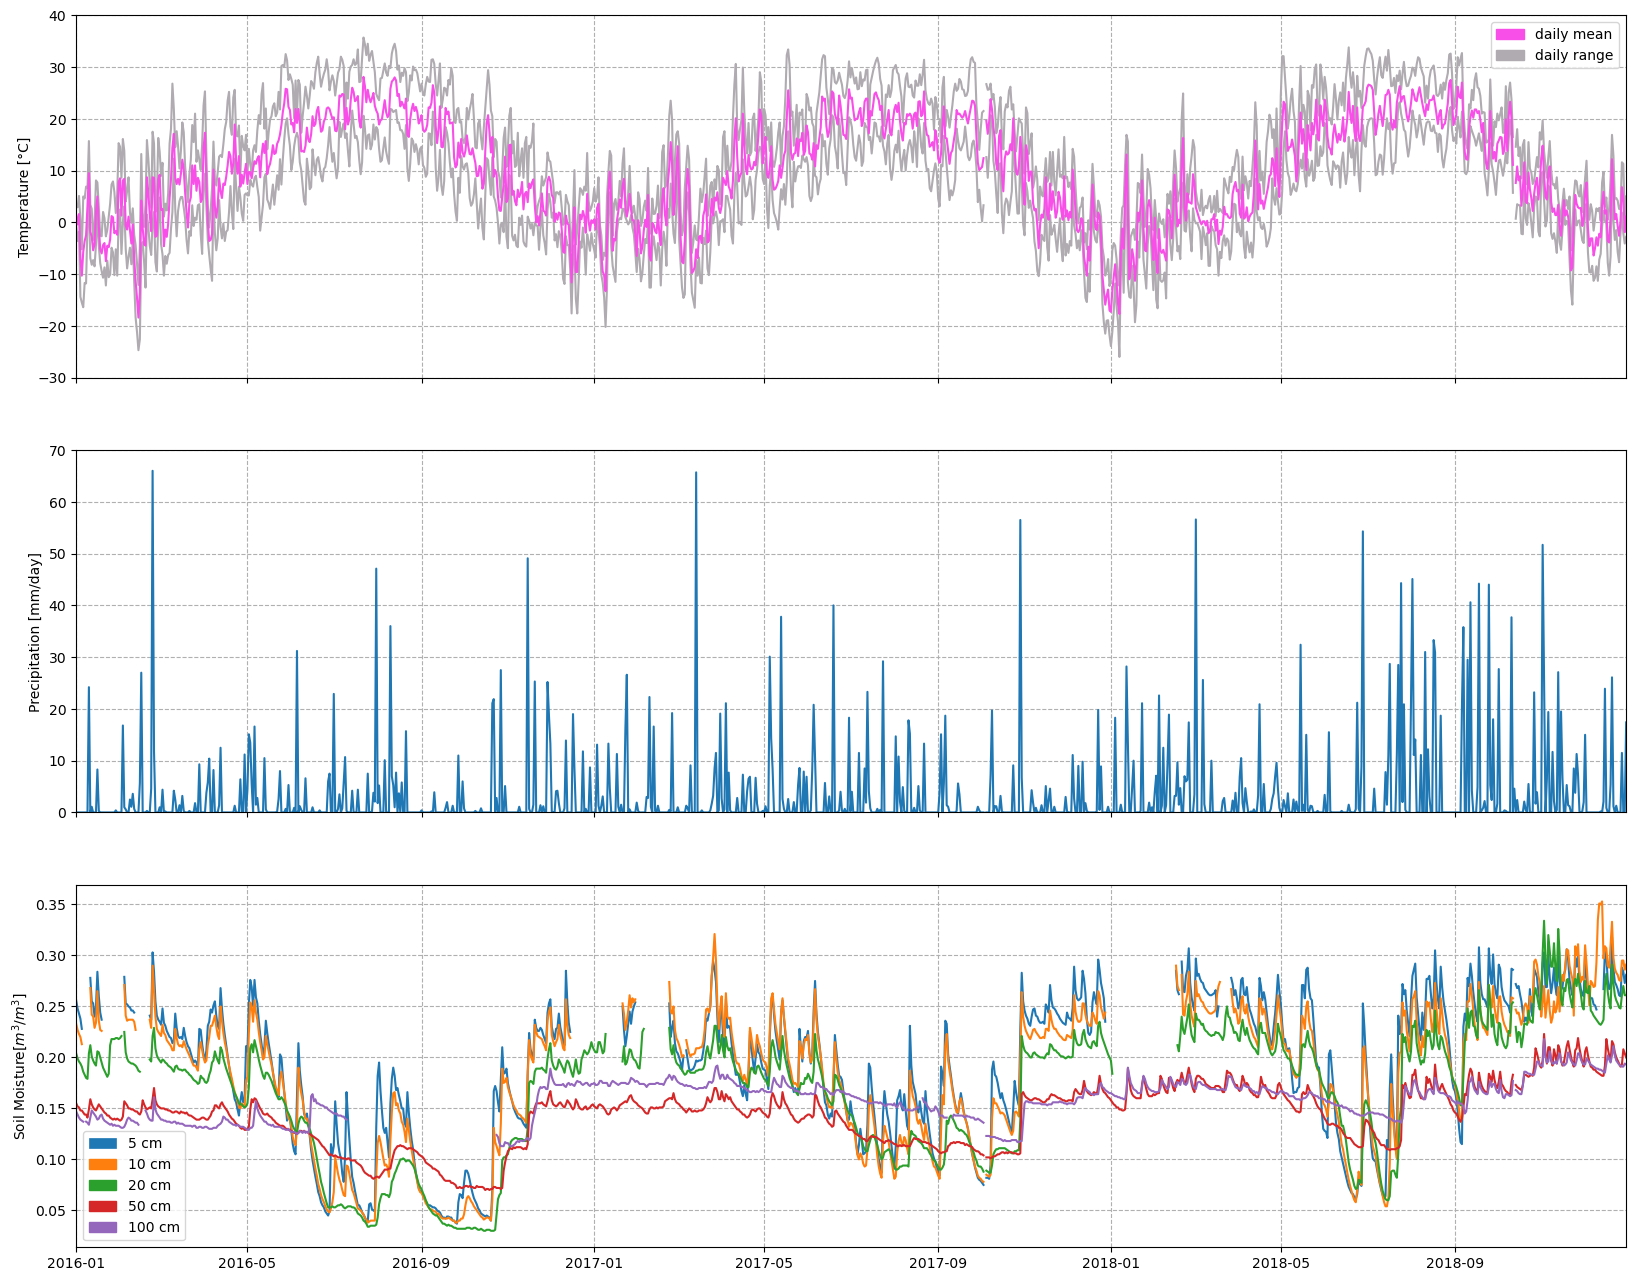

In [5]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

std_t_daily_mean = np.std(t_daily_mean)


#fig = plt.figure(figsize=(12,10))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (20,16), sharex=True)

axes[0].plot(date, t_daily_max, color = '#AFABB0')
axes[0].plot(date, t_daily_min, color = '#AFABB0')
axes[0].plot(date, t_daily_mean, color = '#F74FE7')
axes[0].grid(linestyle = '--')
axes[0].set_ylim(-30, 40)
axes[0].set_xlim(date[0], date[-1])
axes[0].set_ylabel('Temperature [°C]')
mean_patch = mpatches.Patch(color = '#F74FE7', label = 'daily mean')
range_patch = mpatches.Patch(color = '#AFABB0', label = 'daily range')
axes[0].legend(handles = [mean_patch,range_patch])


axes[1].plot(date, p_daily_calc)
axes[1].grid(linestyle = '--')
axes[1].set_ylim(0, 70)
axes[1].set_ylabel('Precipitation [mm/day]')

axes[2].plot(date, soil_moisture_5)
axes[2].plot(date, soil_moisture_10)
axes[2].plot(date, soil_moisture_20)
axes[2].plot(date, soil_moisture_50)
axes[2].plot(date, soil_moisture_100)
axes[2].set_ylabel(f"Soil Moisture[$m^{3}$/$m^{3}$]")
axes[2].grid(linestyle = '--')

patch5 = mpatches.Patch(color= '#1f77b4', label = '5 cm', linewidth=.5)
patch10 = mpatches.Patch(color = '#ff7f0e',label = '10 cm')
patch20 = mpatches.Patch(color = '#2ca02c', label = '20 cm')
patch50 = mpatches.Patch(color = '#d62728' ,label = '50 cm')
patch100 = mpatches.Patch(color = '#9467bd',label = '100 cm')
axes[2].legend(handles = [patch5,patch10,patch20,patch50,patch100])
#axes[2].set_ylim(0, 70)

plt.show()

